# **PROJECT: YOLOv8 PPE DETECTION**


## **IMAGE PROCESSING**
Image processing will be performed to convert raw images to clean images with the requirements for labeling.

### **Library Import**

In [1]:
import cv2
import matplotlib.pyplot as plt

# Print images inside a Notebook
%matplotlib inline

### **Read Image**

Image height: 757
Image width: 500


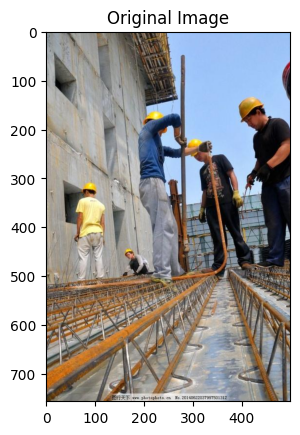

In [20]:
# Read image with opencv
image = cv2.imread('sample_image.jpg')

# Convert image from BGR to RGB
image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image dimensions
(h, w) = image.shape[:2]
print('Image height:', h)
print('Image width:', w)

# Plot image
plt.title('Original Image')
plt.imshow(image_plot)

### **Image Resizing**
For YOLO models we need images with dimensiones 640 x 640

**Resizing height to 640**

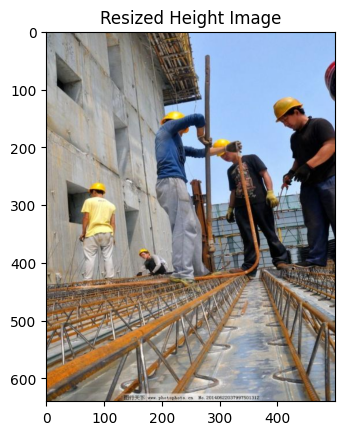

In [17]:
# Resize the height image
resized_height = cv2.resize(image, (w, 640))

# Convert image from BGR to RGB
resized_height_plot = cv2.cvtColor(resized_height, cv2.COLOR_BGR2RGB)

# Plot resized image
plt.title('Resized Height Image')
plt.imshow(resized_height_plot)

**Resizing widht to 640**

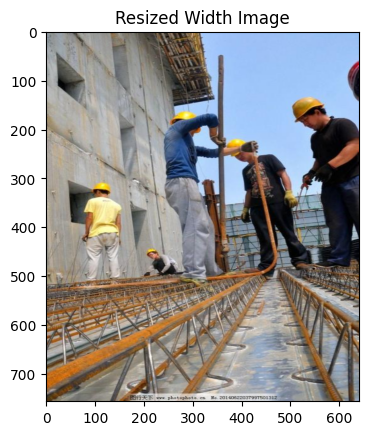

In [18]:
# Resize the wodht image
resized_width = cv2.resize(image, (640, h))

# Convert image from BGR to RGB
resized_width_plot = cv2.cvtColor(resized_width, cv2.COLOR_BGR2RGB)

# Plot resized image
plt.title('Resized Width Image')
plt.imshow(resized_width_plot)

**Resizing width and height to 640**

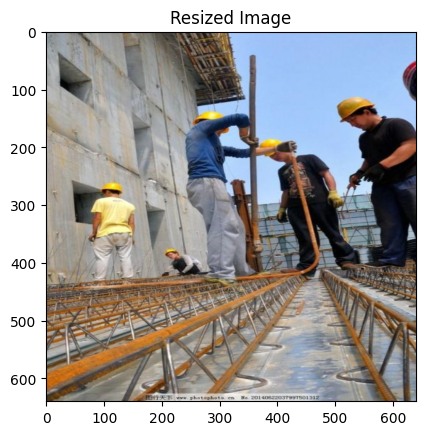

In [19]:
# Resize the wodht image
resized_image = cv2.resize(image, (640, 640))

# Convert image from BGR to RGB
rresized_image_plot = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Plot resized image
plt.title('Resized Image')
plt.imshow(rresized_image_plot)

### **Add Image Padding**

Image height: 757
Image widht: 640


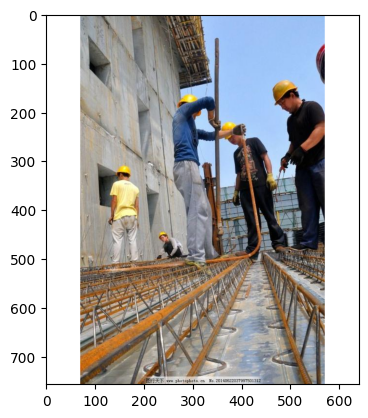

In [30]:
# Read an image with opencv
image = cv2.imread('sample_image.jpg')

# Image dimenesions
(h, w) = image.shape[:2]


# Width difference
diff_w = 640 - w

# Padding
border_type = cv2.BORDER_CONSTANT
value = [255,255,255] # White

# Padding size
pd_left = diff_w // 2
pd_right = diff_w - diff_w // 2

# Add padding
image = cv2.copyMakeBorder(image, 0, 0,pd_left, pd_right, border_type, None, value )

# Plot new dimensiones
(h, w) = image.shape[:2]
print('Image height:', h)
print('Image widht:', w)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_plot)


### **Image Resizing and Padding**

Image Height: 640
Image Widht: 640


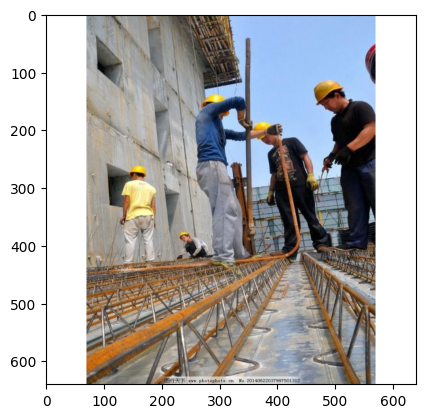

In [31]:
# Read an image with opencv
image = cv2.imread('sample_image.jpg')

# Image dimenesions
(h, w) = image.shape[:2]

# Desired dimensions
desired_h = 640
desired_w = 640

# Dimensions difference
diff_h = desired_h - h
diff_w = desired_w - w

# Padding
border_type = cv2.BORDER_CONSTANT
value = [255,255,255]

# Resizing image
if diff_h < 0 or diff_w < 0:
  resizing_h = desired_h if diff_h < 0 else h
  resizing_w = desired_w if diff_w < 0 else w
  image = cv2.resize(image, (resizing_w, resizing_h))

# Add padding
if diff_h > 0 or diff_w:
  pd_top = diff_h // 2 if diff_h > 0 else 0
  pd_bottom = diff_h - diff_h // 2 if diff_h > 0 else 0
  pd_left = diff_w // 2 if diff_w > 0 else 0
  pd_right = diff_w - diff_w // 2 if diff_w > 0 else 0
  image = cv2.copyMakeBorder(image, pd_top, pd_bottom,pd_left, pd_right, border_type, None, value )

# Plot new image shape
(h, w) = image.shape[:2]
print('Image Height:', h)
print('Image Widht:', w)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_plot)


## **Large Image**

### **Read Original Image**

Image height: 1440
Image width: 2560


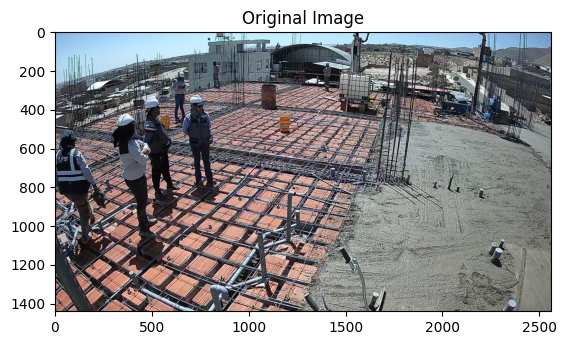

In [2]:
# Read image with opencv
image = cv2.imread('sample_image_2.jpg')

# Convert image from BGR to RGB
image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image dimensions
(h, w) = image.shape[:2]
print('Image height:', h)
print('Image width:', w)

# Plot image
plt.title('Original Image')
plt.imshow(image_plot)

### **Cropping Square Images**

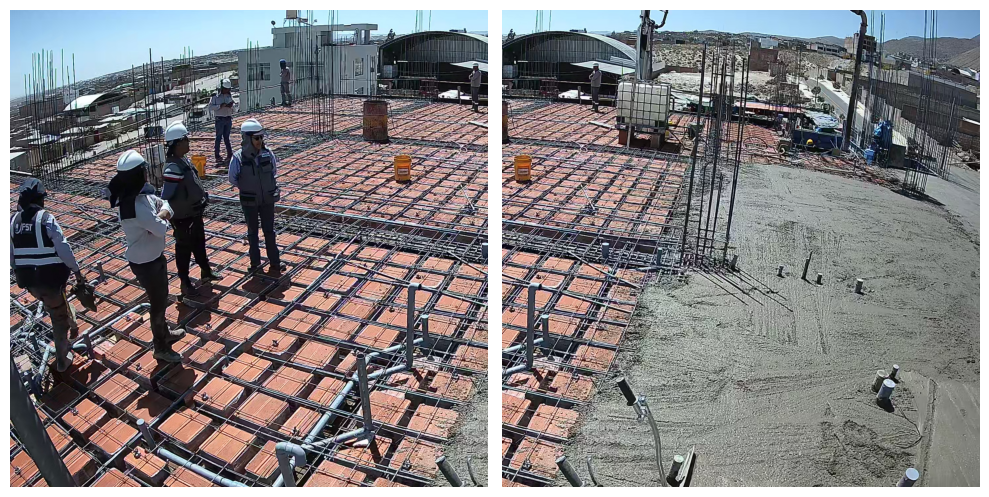

In [25]:
# Read image with opencv
image = cv2.imread('sample_image_2.jpg')

# Image dimensions
(h, w) = image.shape[:2]

dim = h if w - h > 0 else w
image_1 = image[:, 0:dim] if w - h > 0 else image[0:dim, :]
image_2 = image[:, w - dim:w] if w - h > 0 else image[h - dim:h, :]

image_1_plot = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2_plot = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes[0]
ax.imshow(image_1_plot)
ax.axis('off')

ax = axes[1]
ax.imshow(image_2_plot)
ax.axis('off')

plt.tight_layout()
plt.show()

In [35]:
import os
captures_path = os.path.join(os.getcwd(), '../data/captures')
raw_images_path = os.path.join(os.getcwd(), '../data/raw')

capture_dirs = os.listdir(captures_path)
for capture_dir in capture_dirs:
  dst_dir_path = os.path.join(raw_images_path,f'comercio_{capture_dir}')
  os.makedirs(dst_dir_path, exist_ok=True)
  capture_dir_path = os.path.join(captures_path, capture_dir)
  image_captures = os.listdir(capture_dir_path)

  for image_name in image_captures:
    image_path = os.path.join(capture_dir_path, image_name)

    # Read iamge with opencv
    image = cv2.imread(image_path)

    # Image dimensions
    (h, w) = image.shape[:2]

    dim = h if w - h > 0 else w
    image_1 = image[:, 0:dim] if w - h > 0 else image[0:dim, :]
    image_2 = image[:, w - dim:w] if w - h > 0 else image[h - dim:h, :]

    cv2.imwrite(os.path.join(dst_dir_path, f'1_{image_name}'), image_1)
    cv2.imwrite(os.path.join(dst_dir_path, f'2_{image_name}'), image_2)